# Notebook Objective - Display of Results

Here we plot the training progress of the model training and the performance of the model on the test dataset.
For this we use the previously calcualted and stored result.csv and logs.csv file of the model.

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report
from matplotlib.ticker import MaxNLocator

In [2]:
# Specify the model for which the results shall be shown

labels = ['covid', 'lung_opacity', 'normal', 'viral_pneumonia']

base_dir = os.path.abspath('..')
model_name = 'LMAP3_nap'
model_fit = '_raw'
model_path = os.path.join(base_dir, 'models', 'cnn', model_name, model_name + model_fit)

results = pd.read_csv(model_path + '_results.csv')
logs = pd.read_csv(model_path + '_logs.csv')

                 precision    recall  f1-score   support

          COVID       0.96      0.94      0.95       350
   Lung_Opacity       0.84      0.87      0.86       603
         Normal       0.92      0.90      0.91      1024
Viral Pneumonia       0.94      0.98      0.96       135

       accuracy                           0.90      2112
      macro avg       0.92      0.92      0.92      2112
   weighted avg       0.91      0.90      0.91      2112



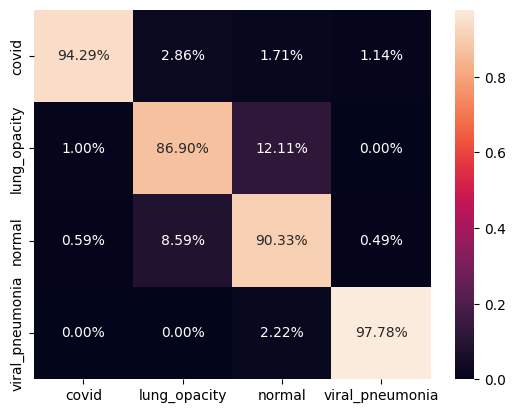

In [3]:
# Create and save the confusion matrix, display the classification report

cmat = confusion_matrix(results.true_labels.values, results.pred_labels.values)
heatmap = sns.heatmap((cmat.transpose()/np.sum(cmat, axis=1)).transpose(), fmt='.2%', annot=True, xticklabels=labels, yticklabels=labels)
heatmap.get_figure().savefig(model_path + '_heatmap.png')
print(classification_report(results.true_classes.values, results.pred_classes.values))

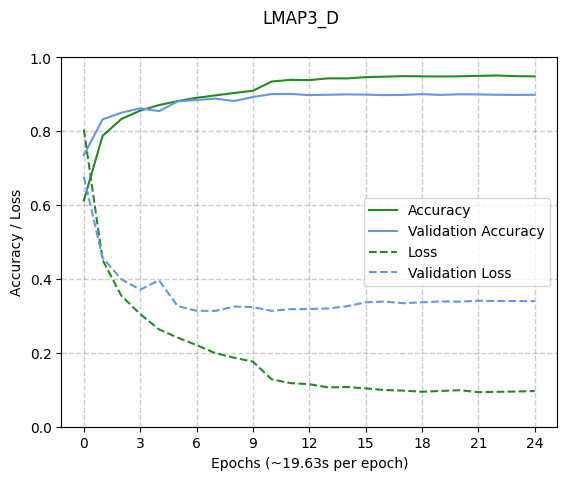

In [4]:
# Visualise and save the training progress

fig, ax = plt.subplots()

fig.suptitle('LMAP3_D')
x = logs['epoch']

time_per_epoch = np.mean(logs['time'])

ax.plot(x, logs['accuracy'], 'forestgreen')
ax.plot(x, logs['val_accuracy'], 'cornflowerblue')

ax.plot(x, logs['loss'], 'forestgreen', linestyle='--')
ax.plot(x, logs['val_loss'], 'cornflowerblue', linestyle='--')

ax.set_ylim([0, 1])
ax.set_xlabel('Epochs (~{time_per_epoch:.2f}s per epoch)'.format(time_per_epoch=time_per_epoch))
ax.set_ylabel('Accuracy / Loss')

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.grid(which='both', color='k', linestyle='--', linewidth=1, alpha=0.2)

plt.legend(['Accuracy', 'Validation Accuracy', 'Loss', 'Validation Loss'])

plt.show()

fig.savefig(model_path + '_training.png')